In [9]:
import pandas as pd
from scipy import stats
import numpy as np

In [10]:
#%% set graphs style
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [11]:
#%% Import data
df = pd.read_csv('bloodpressure.csv')

In [12]:
#%%EX A)
df.columns = ['_', 'values', 'group', 'treatment']
group_1 = df[df['treatment'] == 1]['values']
group_2 = df[df['treatment'] == 2]['values']
p_value = stats.ttest_ind(group_1, group_2, equal_var=True, alternative='two-sided')
se1 = group_1.var()/np.sqrt(len(group_1))
se2 = group_2.var()/np.sqrt(len(group_2))
sed = np.sqrt(se1**2 + se2**2)
p_value, sed

(Ttest_indResult(statistic=9.451231419610627, pvalue=2.29735313852906e-19),
 10.779525946770622)

In [13]:
#%%EX B)
new_group_1 = df[df['treatment'] == 1].groupby('group')['values'].mean().to_numpy().flatten()
new_group_2 = df[df['treatment'] == 2].groupby('group')['values'].mean().to_numpy().flatten()
p_value = stats.ttest_ind(new_group_1, new_group_2, equal_var=True, alternative='two-sided')
se1 = new_group_1.var()/np.sqrt(len(new_group_1))
se2 = new_group_2.var()/np.sqrt(len(new_group_2))
sed = np.sqrt(se1**2 + se2**2)
p_value, sed

(Ttest_indResult(statistic=1.6436975906457643, pvalue=0.11759102056930308),
 42.04213482680317)

In [14]:
from hierarchical_twolayers import Hierarchical
model = Hierarchical(df)

100%|██████████| 5000/5000 [00:04<00:00, 1248.93it/s]


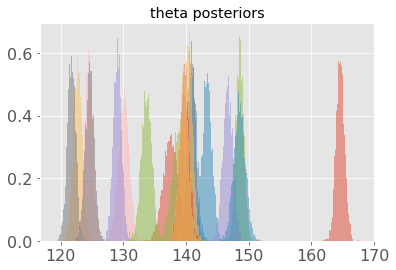

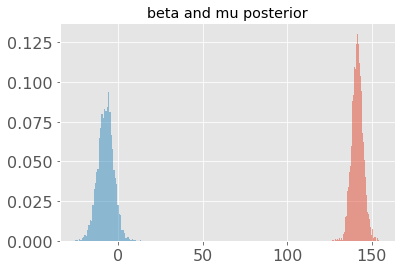

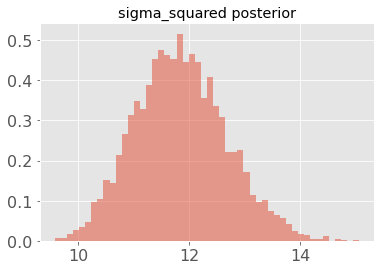

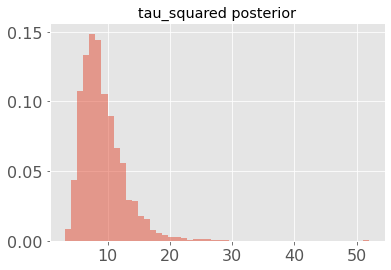

<Figure size 432x288 with 0 Axes>

In [15]:
model.fit_GibbsSampler(n_iter=5000, burn=1000)
model.plot_all_posteriors()

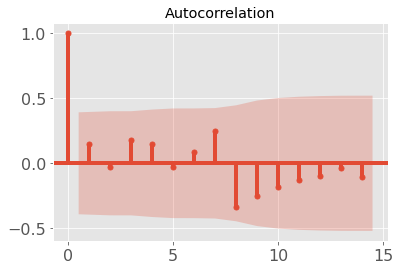

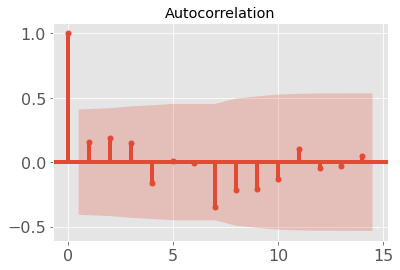

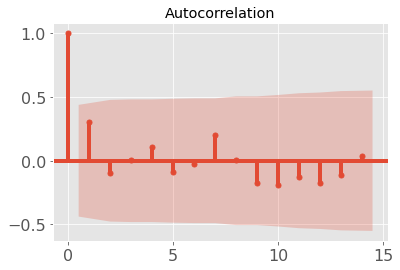

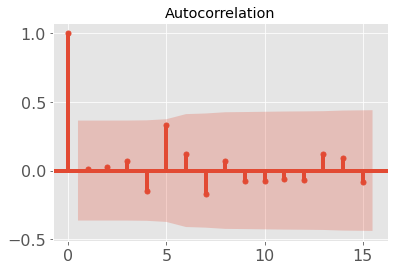

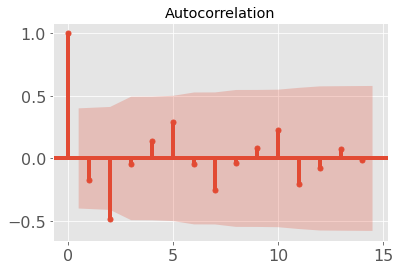

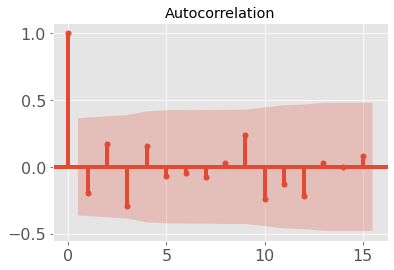

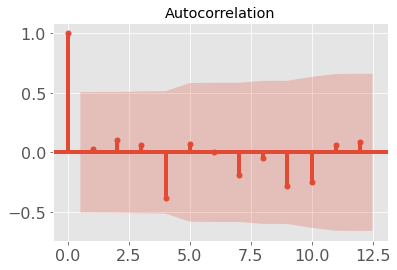

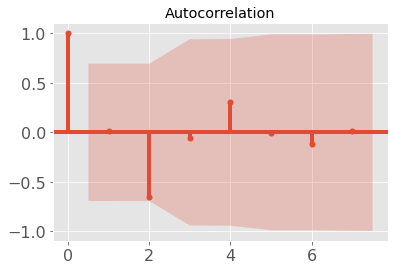

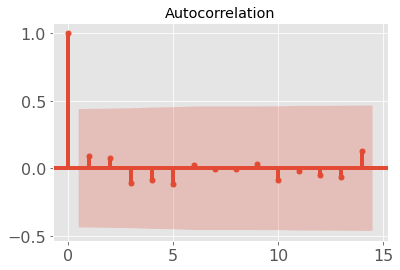

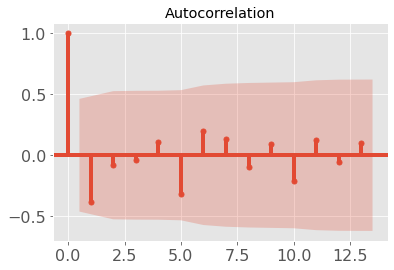

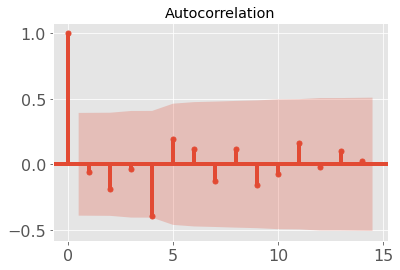

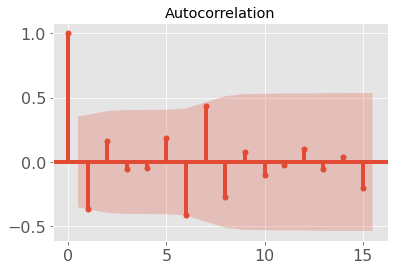

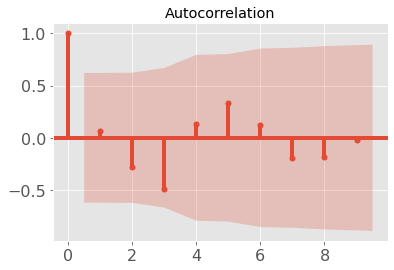

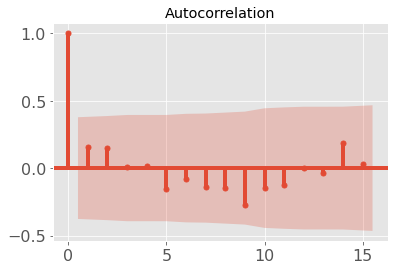

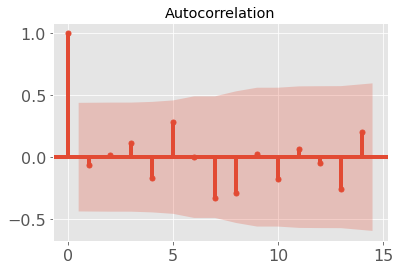

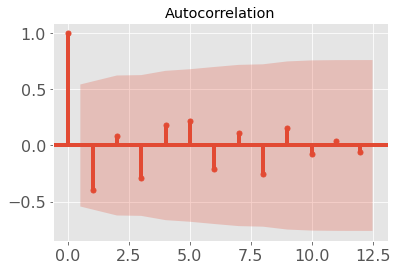

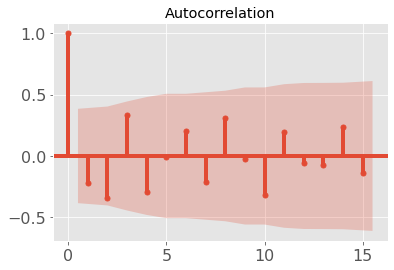

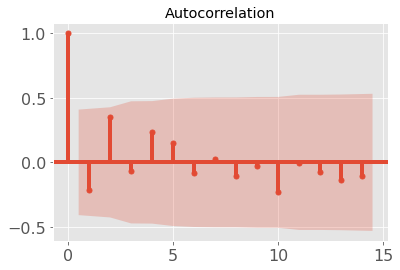

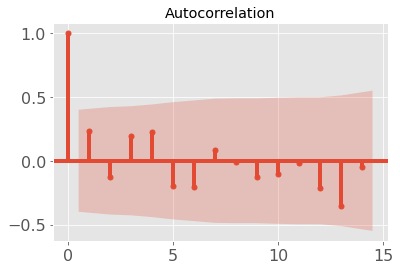

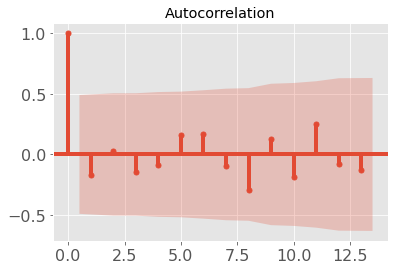

In [7]:
groups = df.groupby('group')['values']
import statsmodels.api as sm
#fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,12))
for key in range(1,len(groups)+1):
    sm.graphics.tsa.plot_acf(groups.get_group(key).to_numpy())
plt.show()